In [1]:
#import csv data 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def read_csv_to_arrays(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Assign the columns to dc and ac arrays
    dc = df.iloc[:, 0].to_numpy()
    ac = df.iloc[:, 1].to_numpy()
    
    return dc, ac

def combine_csv_data(folder_path):
    dc_combined = np.array([])
    ac_combined = np.array([])
    
    # List all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            try:
                dc, ac = read_csv_to_arrays(file_path)
                dc_combined = np.concatenate((dc_combined, dc))
                ac_combined = np.concatenate((ac_combined, ac))
            except ValueError as e:
                print(e)
    #I make cuts above 1 keV so we can see full range of data 
    dc_combined = dc_combined[dc_combined >= 1.0]
    ac_combined = ac_combined[ac_combined >= 1.0]
    
    return dc_combined, ac_combined
    return dc_arrays, ac_arrays

In [2]:
#define each dataset corresponding to each trapping product (in cm)
PATH = "/Users/Sophie/Desktop/COSI/calibrations/Data/SimulatedCSVs"
dc_arrays_10, ac_arrays_10 = combine_csv_data(PATH+"/10cm")
dc_arrays_20, ac_arrays_20 = combine_csv_data(PATH+"/20cm")
dc_arrays_50, ac_arrays_50 = combine_csv_data(PATH+"/50cm")
dc_arrays_100, ac_arrays_100 = combine_csv_data(PATH+"/100cm")
dc_arrays_200, ac_arrays_200 = combine_csv_data(PATH+"/200cm")
dc_arrays_500, ac_arrays_500 = combine_csv_data(PATH+"/500cm")
dc_arrays_1000, ac_arrays_1000 = combine_csv_data(PATH+"/1000cm")
dc_arrays_2000, ac_arrays_2000 = combine_csv_data(PATH+"/2000cm")


dc_array_list = [dc_arrays_10, dc_arrays_20, dc_arrays_50, dc_arrays_100, dc_arrays_200, dc_arrays_500, dc_arrays_1000, dc_arrays_2000]
ac_array_list = [ac_arrays_10, ac_arrays_20, ac_arrays_50, ac_arrays_100, ac_arrays_200, ac_arrays_500, ac_arrays_1000, ac_arrays_2000]

product_val =[10, 20, 50, 100, 200, 500, 1000, 2000]



In [3]:
#plot raw data
# import matplotlib.pyplot as plt
# for i in range(len(dc_array_list)):
#     #plot histograms of ac and dc data 
#     plt.figure(figsize=(14, 6))
#     plt.subplot(1, 2, 1)
#     plt.hist(dc_array_list[i], bins =100, color='blue', alpha=0.7)
#     plt.title('Cs-137 DC Strips: $[n \sigma]^{-1} = $'+ str(product_val[i]) )
#     plt.xlabel('Energy (keV)')
# for i in range(len(ac_array_list)):
#     #plot histograms of ac and dc data 
#     plt.figure(figsize=(14, 6))
#     plt.subplot(1, 2, 1)
#     plt.hist(ac_array_list[i], bins =100, color='blue', alpha=0.7)
#     plt.title('Cs-137 AC Strips: $[n \sigma]^{-1} = $'+ str(product_val[i]) )
#     plt.xlabel('Energy (keV)')


In [4]:
#add the gaussian noise expected from the COSI detector response (sans trapping)
def add_noise(data_ac, data_dc, noise_ac, noise_dc): #data is an array of datasets, noise is FWHM in keV


    std_dc = noise_dc/2.335
    std_ac = noise_ac/2.335
    
    #empty lists to store noisy data
    dc_noised =[]
    ac_noised=[]
    
    for i in range(len(data_dc)):
        
        bin_num_dc = len(data_dc[i])
        bin_num_ac = len(data_ac[i])
        
        noise_dc = np.random.normal(loc=661.657, scale=std_dc, size=bin_num_dc)
        noise_ac = np.random.normal(loc=661.657, scale=std_ac, size=bin_num_ac)
    
        #add noise to data 
        dc_noised.append(data_dc[i]+noise_dc)
        ac_noised.append(data_ac[i]+noise_ac)

    return ac_noised, dc_noised, noise_ac, noise_dc

In [5]:
#plot raw data, noise, and noised data 

def plot_noised_data(data_ac, data_dc, noise_ac, noise_dc):

    ac_noised = add_noise(data_ac, data_dc, noise_ac, noise_dc)[0]
    dc_noised = add_noise(data_ac, data_dc, noise_ac, noise_dc)[1]
    noise_ac = add_noise(data_ac, data_dc, noise_ac, noise_dc)[2]
    noise_dc = add_noise(data_ac, data_dc, noise_ac, noise_dc)[3]
    

    for i in range(len(data_dc)):
        
        #dc
        plt.hist(dc_noised[i]- 661.657, bins=150, label="noised data")
        plt.hist(data_dc[i], bins=150,  histtype="step",label ="raw data")
        plt.hist(noise_dc, bins=150, histtype="step",label ="noise")
        plt.xlim(655, 665)
        plt.title("DC strips: $[n \sigma]^{-1} = $"+ str(product_val[i]))
        plt.legend()
        plt.show()
        
        #ac
        plt.hist(ac_noised[i]- 661.657, bins=150, label="noised data")
        plt.hist(data_ac[i], bins=150, histtype="step", label ="raw data")
        plt.hist(noise_ac, bins=150, histtype="step",label ="noise")
        plt.xlim(655, 665)
        plt.title("AC strips: $[n \sigma]^{-1} = $"+ str(product_val[i]))
        plt.legend()
        plt.show()

In [6]:

# for i in range(len(dc_array_list)):
#     plt.hist(dc_noised[i]- 661.657, bins=100, label="noisy data") #subtract mean of normal distrib to keep count rate consitent 
#     plt.title("DC strips: $[n \sigma]^{-1} = $"+ str(product_val[i]))
#     plt.xlabel("Energy (keV)")
#     plt.ylabel("Count")
#     plt.show()
    
#     plt.hist(ac_noised[i]- 661.657, bins=100, label="noisy data") #subtract mean of normal distrib to keep count rate consitent 
#     plt.title("AC strips: $[n \sigma]^{-1} = $"+ str(product_val[i]))
#     plt.xlabel("Energy (keV)")
#     plt.ylabel("Count")
#     plt.show()

In [7]:
#define spline function that:
# (1) takes a spline fit of a dataset
# (2) calculates a FWHM and FWTM from the fit
# (3) returns plots w spline fit and FWHM and FWTM listed and plotted 
# (4) returns ratio of FWHM/FWTM 
def spline(energies, title):

    from scipy.interpolate import UnivariateSpline

    bin_num = int(energies.max()-energies.min())*4 # 4 bins per keV
    fs = 12 #fontsize 
   
    
    #define histogram
    hist,binedges,_  = plt.hist(energies, histtype="step", bins=bin_num, weights=np.full_like(energies, 0.5), color ='cornflowerblue')

    #use axes from plotting function to plot spline fot from this function 
    
    #plt.yscale('log')
    plt.xlabel('Energy (keV)', fontsize=fs+2)
    plt.ylabel('Counts', fontsize=fs+2)
    plt.title("Spline Fit for " +str(title), fontsize= fs+4)
    

    #plot a spline for the hist 
    bin_centers = np.array((binedges[:-1] + binedges[1:]) / 2)
    n, bins, patches = plt.hist(energies,histtype="step", bins=bin_num, weights=np.full_like(energies, 0.5), color ='cornflowerblue')
    spline = UnivariateSpline(bin_centers, n)
    plt.plot(bin_centers, spline (bin_centers), color = 'red',linestyle ='--', label='spline')

    #plot FWHM and FWTM as horizontal lines
    tenth_max = np.max(hist)/10
    half_max= np.max(hist)/2
    plt.axhline(y = tenth_max, color = 'mediumorchid', linestyle = ':', label="FWTM") 
    plt.axhline(y = half_max, color = 'darkblue', linestyle = ':', label="FWHM") 

    
    #define FWHM and FWTM splines by subtracting a portion of the peak value from the hist values
    FWHM_spline = UnivariateSpline(binedges[:-1], hist-0.5*np.max(hist))
    FWTM_spline = UnivariateSpline(binedges[:-1], hist-0.1*np.max(hist))

    #calculate FWHM and FWTM by subtracting roots of y-shifted spline fit 
    FWHM = FWHM_spline.roots()[-1]-FWHM_spline.roots()[0]
    FWTM = FWTM_spline.roots()[-1]-FWTM_spline.roots()[0]

    #define errors 
    

    #write FWHM and FWTM on plot
    plt.text(energies.min()+1, np.max(hist)*0.95,  "FWHM = " + str(round(FWHM, 3)) +" keV", fontsize =fs)
    plt.text(energies.min()+1, np.max(hist)*0.85,  "FWTM = " + str(round(FWTM, 3)) +" keV", fontsize =fs)
    plt.text(energies.min()+1, np.max(hist)*0.75,  "FWHM/FWTM = " + str(round(FWHM/FWTM, 6)) +" keV", fontsize =fs)

    plt.legend(fontsize=fs, loc="lower left")
    #plt.show()

    return FWHM, FWTM

In [8]:
#plot spline fits for each trapping product 
def plot_spline(data_ac, data_dc, noise_ac, noise_dc):
    dc_splines=[]
    ac_splines=[]

    #ac_noised = add_noise(data_ac, data_dc, noise_ac, noise_dc)[0]
    dc_noised = add_noise(data_dc, data_dc, noise_ac, noise_dc)[1]

    FWHM = []
    
    for i in range(len(data_dc)):

        #append FWHM for each trapping products to create an list of FWHM 
        FWHM.append(spline(dc_noised[i]- 661.657, "DC strips: $[n \sigma]^{-1} = $"+ str(product_val[i]))[0])
                      
        dc_splines.append(spline(dc_noised[i]- 661.657, "DC strips: $[n \sigma]^{-1} = $"+ str(product_val[i])))
        #ac_splines.append(spline(ac_noised[i] - 661.657, "AC strips: $[n \sigma]^{-1} = $"+ str(product_val[i])))

    return FWHM 



In [9]:
#define initial noise params 
AC_noise = 4.2 #keV
DC_noise = 2.5 #keV

In [15]:
#to find the error on the FWHM added by the spline method,
#iterate the calculations/fitting process and find the error of the distribution

FWHM_distrib = []


from itertools import zip_longest

for i in range(100):
    FWHM =  plot_spline(ac_array_list,dc_array_list, AC_noise, DC_noise)
    FWHM_distrib.append(FWHM)
combined_FWHM = [list(filter(None, x)) for x in zip_longest(*FWHM_distrib, fillvalue=None)]


Error in callback <function _draw_all_if_interactive at 0x17f224a40> (for post_execute), with arguments args (),kwargs {}:


ValueError: object __array__ method not producing an array

ValueError: Image size of 788x126481 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [18]:
#determining error on FWHM due to spline fitting method 

product_val_stds = []
product_val_means = []
for i in range(len(combined_FWHM)):
    product_val_stds.append(np.round(np.std(combined_FWHM[i]), 2))
    product_val_means.append(np.round(np.mean(combined_FWHM[i]), 2))
    plt.hist(combined_FWHM[i], bins=20)
    plt.title("FWHM Distribution for " +str(product_val[i]) +" cm")
    plt.text(np.mean(combined_FWHM[i])-np.std(combined_FWHM[i]), 0.5*np.max(combined_FWHM[i]), "$\sigma = $" + str(np.round(np.std(combined_FWHM[i]), 2))+ " keV", fontsize=16)
    plt.show()
print(product_val_means)    

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

[158.48, 85.86, 35.8, 18.4, 9.35, 3.91, 2.8, 2.58]


In [19]:
#now we find the actual detector noise 

#define FWHM for dc data since holes / hole collecting strips will experience the most trapping 
FWHMs_dc = product_val_means

#define trapping product values for plotting against FWHM
product_val = [ 10, 20,50, 100, 200, 500, 1000, 2000]
labels = [ "10", "20", "50", "100cm", "200cm", "500cm", "1000cm", "2000cm"]


In [20]:
# #plot FWHM against trapping products

# plt.scatter(product_val, FWHMs_dc, marker="*")

# labels = ["10cm", "20cm", "50cm", "100cm", "200cm", "500cm", "1000cm", "2000cm"]
# for i, label in enumerate(labels):
#     plt.text(product_val[i]-10, FWHMs_dc[i]+0.75, label, ha='right', fontsize=11)
# plt.title("Cs-137 FWHM for Hole-Collecting Strips", fontsize=16)
# plt.ylabel("FWHM (keV)", fontsize=12)
# plt.xlabel("$[n \sigma]^{-1} = $ (cm)", fontsize = 12)
# #plt.legend()
# plt.grid(True)
# #plt.xscale("log")

In [21]:
##############   functions for fitting and interpolations ##########################################

#exponential decay fititng function

 # Define the exponential decay function
def exponential_decay(product, A, l):
    return A * np.exp(-l / product) 

def exponential_decay_2(t, A, tau):
    return A * np.exp(-t /tau) 
        
def decayfit(x_data, y_data, A_init, l_init, xmin, xmax):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    
    # Define the time points and corresponding values (you can replace these with your actual data)
    x_array = np.array(x_data)  # Time points
    y_array = np.array(y_data)  # Corresponding values
    
    # Input initial guess parameters for the exponential decay fit
    initial_guess = [A_init, l_init]  # A, tau

    
    # Fit the data to the exponential decay function
    popt, pcov = curve_fit(exponential_decay_2 , x_array, y_array, p0=initial_guess)

    print("errors:" + str(np.sqrt(np.diag(pcov))))
    
    # Extract fitted parameters
    A_fit, l_fit = popt

    #return continuous arrays for plotting the exponential curve
    x_continuous = np.linspace(xmin, xmax, 100)  # Continuous time points for plotting
    y_continuous = exponential_decay_2(x_continuous, A_fit, l_fit)

    return x_continuous, y_continuous, l_fit, A_fit
    
    


In [22]:
# define a function with plots the data and the fitted curve
def exp_plot(x_data, y_data,  A_init, l_init, xmin, xmax, ymin, ymax, xlabel, ylabel, labels=False):
    plt.figure(figsize=(8, 6))

    #scatter plot of data points
    plt.scatter(x_data, y_data)
    if labels!= False:
        #labels for data points
        for i, label in enumerate(labels):
            plt.text(x_data[i]+65, y_data[i]+0.025, label, ha='right', fontsize=11)

    #plot exponential fit 
    plt.plot(decayfit(x_data, y_data, A_init, l_init, xmin, xmax)[0], decayfit(x_data, y_data, A_init, l_init, xmin, xmax)[1],'g-', label='Exponential Decay')

    
    #plt.title("Cs-137 DC Strips -- Simulation Data", fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylim(ymin, ymax)

    #plt.yscale("log")
    
    plt.grid(True)
    #plt.legend
    #plt.show()
    
    # Calculate the time constant (tau) and print it 
    l_constant = decayfit(x_data, y_data, A_init, l_init, xmin, xmax)[2]
    A_constant = decayfit(x_data, y_data, A_init, l_init, xmin, xmax)[3]
    print("Decay Constant:", -l_constant)
    print("Amp:", A_constant)
    #print(decayfit(x_data, y_data, A_init, l_init, xmin, xmax)[3])
    


In [23]:
# #need to find a way to map the trapping product vs time 

# #to have the FWHM cover the same range as we saw in anneals at 100C we remove 50cm trapping product s.t all FWHM < 25 keV

# #redefine datasets
# FWHMs_dc_new =[ dc_splines[3][0], dc_splines[4][0], dc_splines[5][0], dc_splines[6][0], dc_splines[7][0]]
# product_val_new = [  100, 200, 500, 1000, 2000]
# labels_new = [  "100cm", "200cm", "500cm", "1000cm", "2000cm"]

# #subtracting noise in order to track just the FWHM induced from radiation damage
# FWHMs_rad_new = []
# for FWHM in FWHMs_dc_new:
#     FWHMs_rad_new.append(np.sqrt(FWHM**2 - FWHM_dc**2))

# exp_plot(product_val_new, FWHMs_rad_new, 20.0, 100.0 ,0.0, 2000.0,0, 50, "$[n \sigma]^{-1} = $ (cm)", "Radiation Induced FWHM (keV)", labels=labels_new)






In [24]:
#we want to derive a relationship between trapping product and FWHM
#take a linear interpolation of the traping products vs their simulated FWHM and create a function out of it:

from scipy.interpolate import interp1d

#plot FWHM vs products
x = np.array(FWHMs_dc)
y = np.array(product_val)

#create function of interpolation:
f_linear = interp1d(x, y, kind='linear')

# Generate new x values for a smooth curve
x_new = np.linspace(x.min(), x.max(), 500)

# Compute the interpolated y values
y_linear = f_linear(x_new)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_new, y_linear, '-', label='Linear interpolation')
plt.title("Linear interpolation of Unajusted FWHM to $[n \sigma]^{-1}$")
plt.ylabel("$[n \sigma]^{-1} = $ (cm)")
plt.xlabel("$FWHM$ (keV)")
plt.legend()


Error in callback <function _draw_all_if_interactive at 0x17f224a40> (for post_execute), with arguments args (),kwargs {}:


ValueError: object __array__ method not producing an array

ValueError: object __array__ method not producing an array

<Figure size 1000x600 with 1 Axes>

In [25]:
# Sean finds, from in lab data, our pre radiation trapping product is ~1850cm

#trying to find FWHM corresponding to 1860cm 

min_array = np.arange(x.min(), 2.7, 0.00001)

for i in min_array:
    if np.round(f_linear(i), 1) == 1786.0:
        FWHM_0=i
  
print(FWHM_0)

#the baseline FWHM for the simulated detector is this subtracted from the added electronic noise in quadrature

FWHM_intrinsic = np.sqrt( FWHM_0**2- DC_noise**2)



print(FWHM_intrinsic) 

#our FWHM preradiation from in-lab data is:
FWHM_prerad_inlab = 2.67 #keV

#subtract intrinsic FWHM from this to get the detector noise in lab

DC_noise_inlab = np.sqrt(FWHM_prerad_inlab**2 - FWHM_intrinsic**2)

#note the value was 0.7812591074039963 so we wont have to run so many fits again 

2.6270900000003086
0.8072185999477596


In [26]:
#defining it here so we don't have to rerun above simualtions 
FWHM_intrinsic= 0.7812591074039963
#our FWHM preradiation from in-lab data is:
FWHM_DC_prerad_inlab = 2.67 #keV
FWHM_AC_prerad_inlab = 4.26 #keV

#subtract intrinsic FWHM from this to get the detector noise in lab

DC_noise_inlab = np.sqrt(FWHM_DC_prerad_inlab**2 - FWHM_intrinsic**2)

#define AC noise but its arbitrary

AC_noise_inlab = np.sqrt(FWHM_AC_prerad_inlab**2 - FWHM_intrinsic**2)

In [28]:
#now add actual noise to simulated data instead of the noise estimate we used before 

#unfortunately the most accurate way is to take a distribution of FWHM again 
#fml 

#note that I'm ignoring all the AC adjustments bc we don't care abt them 


FWHM_distrib_adj = []

for i in range(200):
    FWHM =  plot_spline(ac_array_list,dc_array_list, AC_noise_inlab, DC_noise_inlab)
    FWHM_distrib_adj.append(FWHM)



Error in callback <function _draw_all_if_interactive at 0x17f224a40> (for post_execute), with arguments args (),kwargs {}:


ValueError: object __array__ method not producing an array

ValueError: Image size of 788x252881 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [136]:
from itertools import zip_longest
combined_FWHM_adj = [list(filter(None, x)) for x in zip_longest(*FWHM_distrib_adj, fillvalue=None)]

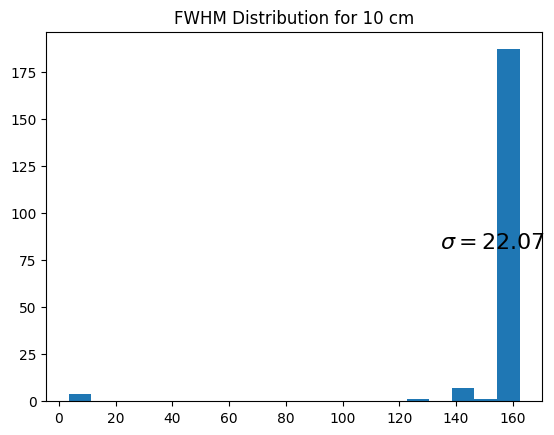

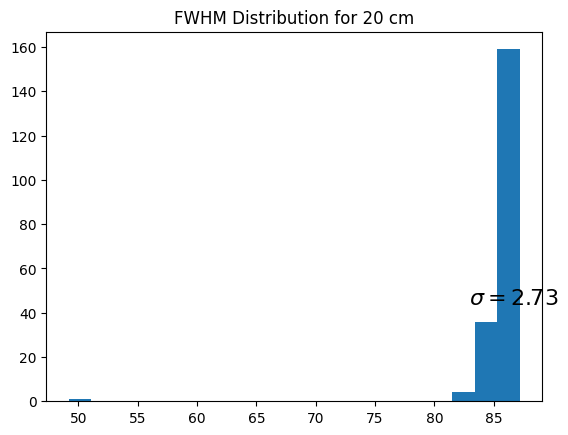

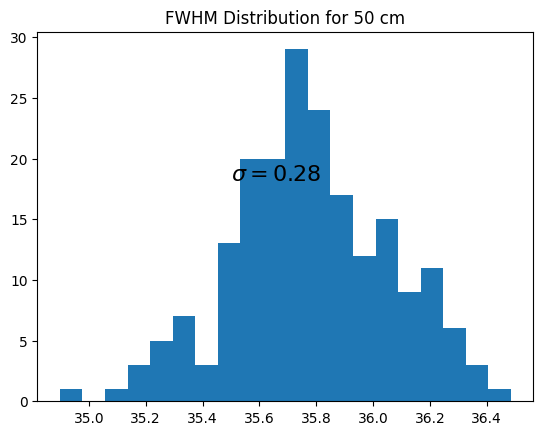

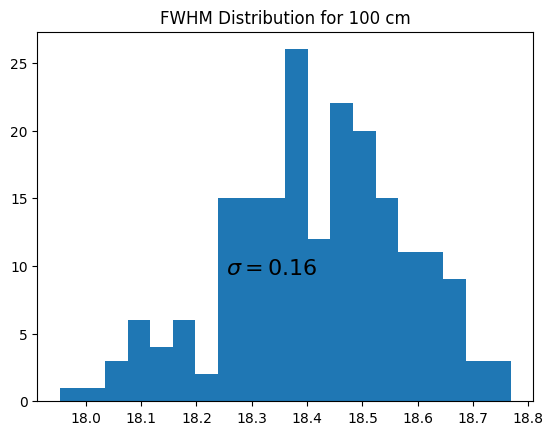

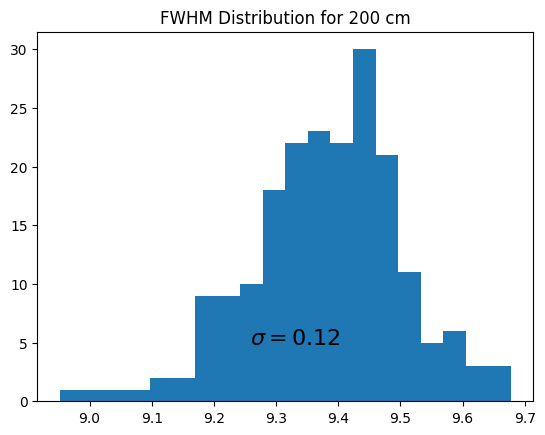

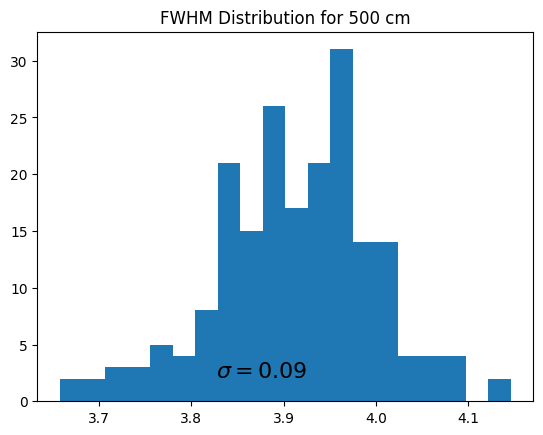

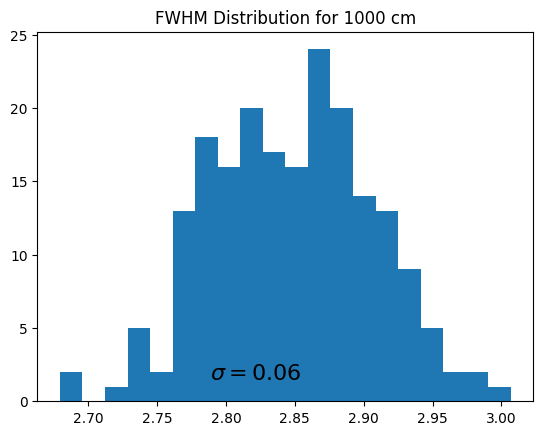

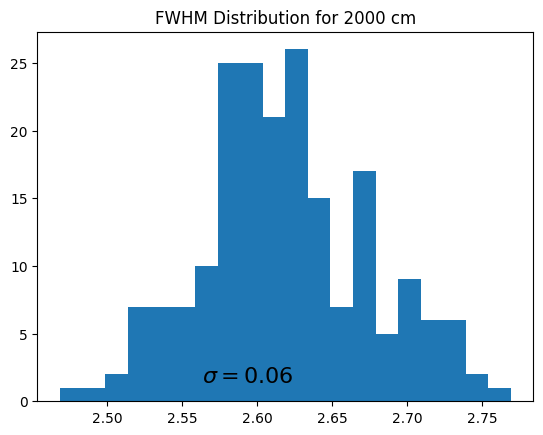

[156.25, 85.63, 35.78, 18.42, 9.38, 3.91, 2.85, 2.62] [22.07, 2.73, 0.28, 0.16, 0.12, 0.09, 0.06, 0.06]


In [137]:
#determining error on FWHM due to spline fitting method 

product_val_stds_adj = []
product_val_means_adj = []
for i in range(len(combined_FWHM_adj)):
    product_val_stds_adj.append(np.round(np.std(combined_FWHM_adj[i]), 2))
    product_val_means_adj.append(np.round(np.mean(combined_FWHM_adj[i]), 2))
    plt.hist(combined_FWHM_adj[i], bins=20)
    plt.title("FWHM Distribution for " +str(product_val[i]) +" cm")
    plt.text(np.mean(combined_FWHM_adj[i])-np.std(combined_FWHM_adj[i]), 0.5*np.max(combined_FWHM_adj[i]), "$\sigma = $" + str(np.round(np.std(combined_FWHM_adj[i]), 2)), fontsize=16)
    plt.show()
print(product_val_means_adj,product_val_stds_adj)    

[22.07, 2.73, 0.28, 0.16, 0.12, 0.09, 0.06, 0.06]


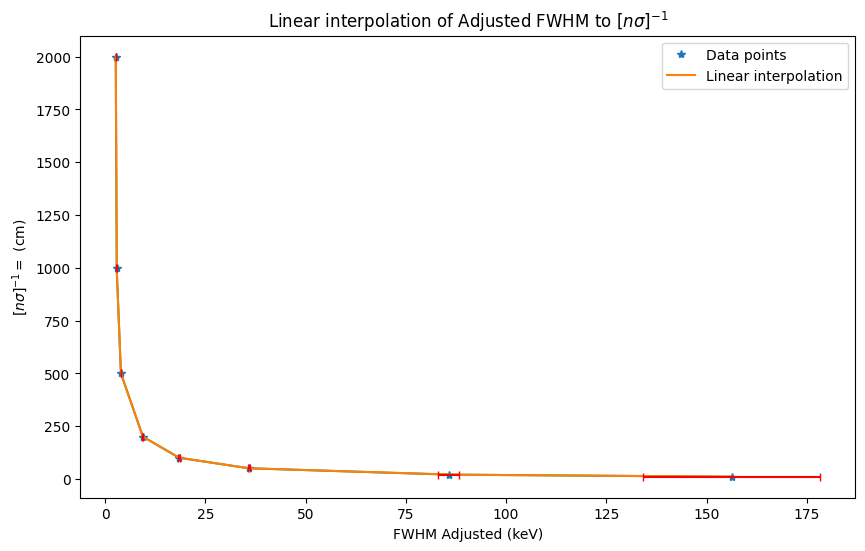

In [138]:
#create linear interpolation for these FWHM corresponding to their trapping values like before
#plot FWHM vs products
x_rad = np.array(product_val_means_adj) 
y_rad = np.array([ 10, 20,50, 100, 200, 500, 1000, 2000])  #note no 2000cm here 

#create function of interpolation:
f_linear_rad = interp1d(x_rad, y_rad, kind='linear')


# Generate new x values for a smooth curve
x_rad_new = np.linspace(x_rad.min(), x_rad.max(), 500)

# Compute the interpolated y values
y_rad_linear = f_linear_rad(x_rad_new)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_rad, y_rad, '*', label='Data points')
plt.plot(x_rad_new, y_rad_linear, '-', label='Linear interpolation')
plt.errorbar(x_rad, y_rad, xerr=product_val_stds_adj, ecolor="r", capsize=3, barsabove =True)
plt.title("Linear interpolation of Adjusted FWHM to $[n \sigma]^{-1}$")
plt.ylabel("$[n \sigma]^{-1} = $ (cm)")
plt.xlabel("FWHM Adjusted (keV)")
plt.legend()
print(product_val_stds_adj)

In [139]:
# #subtracting noise in order to track just the FWHM induced from radiation damage 
# #and not pertaining to the intrinsic trapping in the simulated detector

# #there is some trapping product which characterizes the intrinsic trapping in the simulated detector (w/o noise)
# #Sean finds in his depth analysis that this happens at 1860 cm 


# #now to track just the radiation induced trapping, we subtract this FWHM from the ones we obtained from simulation

# FWHMs_rad = []
# for FWHM in FWHMs_dc:
#     FWHM_rad = np.sqrt(FWHM**2 - FWHM_0**2)
#     if FWHM_rad > 0.0:
#         FWHMs_rad.append(FWHM_rad)   #subtracting baseline 

#         #note that the trapping product 2000cm represents a detector with lower trap density than we would see pre radiation so we neglect it
# print(FWHMs_rad)

# #we haver just subtracted off the FWHM which we attributed to noise and intrinsic detector trapping and 
# #now the resulting FWHM is only attributed to radiation damage

In [140]:
# #now we have FWHM just from radiation corresponding to trapping products so to relate the products to lab FWHM from radiation in lab
# #we ned to fit another function based just on the simulated radiation induced FWHM
# #the function before will not do as it relates mixed FWHM to trapping product and will not map one to one with thelab detector
# #since each detector has intrinsic trapping properties that we've subtracted off

# #anyways, new function:

# #plot FWHM vs products
# x_rad = np.array(FWHMs_rad) 
# y_rad = np.array([ 10, 20,50, 100, 200, 500, 1000])  #note no 2000cm here 

# #create function of interpolation:
# f_linear_rad = interp1d(x_rad, y_rad, kind='linear')


# # Generate new x values for a smooth curve
# x_rad_new = np.linspace(x_rad.min(), x_rad.max(), 500)

# # Compute the interpolated y values
# y_rad_linear = f_linear_rad(x_rad_new)


# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(x_rad, y_rad, 'o', label='Data points')
# plt.plot(x_rad_new, y_rad_linear, '-', label='Linear interpolation')
# plt.ylabel("$[n \sigma]^{-1} = $ (cm)")
# plt.xlabel("$FWHM_{rad}$ (keV)")
# #plt.ylim(0, 100)
# plt.legend()


trapping products (cm): [ 91.92172418  97.52409452 115.42405985 306.51114638 887.52890724
 868.82793349]
Slope error: 0.27140261669057947 Intercept error: 75.82194482656807
Linear fit slope and intercept: [ 1.67024874 67.25422538]
Slope = 1.670249 +/- 0.271403 $cm hr^{-1}$


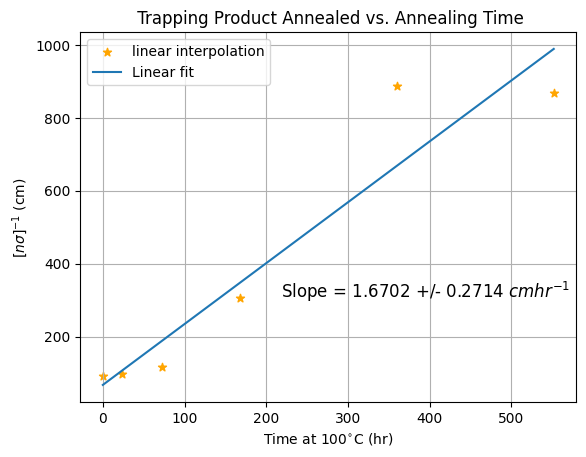

In [141]:
#Now feed the FWHM from experiment (in lab radiation and annealing) into the above function to return products corresponding to time annealing:

#define arrays of trapping products corresponding to times at 100C and their respective FWHMs
#from Cs137  radiation and annealing notebook:




FWHM_anneal = [21.22477736488156, 19.27963438313418, 17.025664989410984, 7.43794676440632, 3.088438716642372, 3.1280847810038495] #these are the full FWHM


#create labels for plotting 
labels=["anneal2", "anneal3", "anneal4", "anneal5", "anneal6", "anneal7"]

#print the trapping product for each annealing value
print(f"trapping products (cm): {f_linear_rad(FWHM_anneal)}")


#time annealing at 100C (hr) for plotting
times =[0, 24, 72, 168, 360, 552]


#for scaling the product against 
scale_factor= 1
scaled_product = f_linear_rad(FWHM_anneal)/scale_factor

#plot product vs time annealing  scatter
plt.scatter(times, scaled_product, marker ="*", color ='orange', label ="linear interpolation")
plt.xlabel("Time at 100$^{\circ}$C (hr)")
plt.ylabel("$[n \sigma]^{-1}$ (cm) ")
#plt.ylabel("$\dfrac{[n \sigma]^{-1}}{[n \sigma]^{-1}_{0}}$ ")
plt.title(" Trapping Product Annealed vs. Annealing Time")

#Fit the data points 
# Find the linear fit (polynomial of degree 1)
coefficients, cov = np.polyfit(times,scaled_product , 1, cov=True)

#compute errors
slope_error= np.sqrt(np.diag(cov))[0]
intercept_error = np.sqrt(np.diag(cov))[1]

print("Slope error: "+ str(slope_error), "Intercept error: " + str(intercept_error))


# Create a polynomial function from the coefficients
linear_fit = np.poly1d(coefficients)

# Generate new x values/times for the fit line
times_new = np.linspace(np.array(times).min(), np.array(times).max(), 500)

# Compute the y values/trapping products for the fit line
y_fit = linear_fit(times_new)

#plot the fit 
plt.plot(times_new, y_fit, label ="Linear fit ")


# Print the coefficients
print(f"Linear fit slope and intercept: {coefficients}")

plt.text(times[3]+50, scaled_product[3], "Slope = " + str(round(coefficients[0], 4) )+ " +/- "+str(round(slope_error, 4)) +" $cm hr^{-1}$", fontsize=12)
#plt.text(times[3]+50, scaled_product[3]-0.05, "$[n \sigma]^{-1}_{0} = "+str(scale_factor)+" cm$", fontsize=12)
print("Slope = " + str(round(coefficients[0], 6) )+ " +/- "+str(round(slope_error, 6)) +" $cm hr^{-1}$")

plt.legend()
plt.grid()





In [148]:
# tot_anneal_times = [0, 24, 48, 72, 120, 216, 408, 600]
# Q_factor = [268.87436167560884, 40.78639437255751, 24.167589861771212, 9.856089334042373, 3.303266870813766, 2.6104697925914233, 3.757852430191501, 5.568883203775273]
# label_array = ["room temp", "anneal 1", "anneal 2", "anneal 3", "anneal 4", "anneal 5", "anneal 6", "anneal 7"]
# exp_plot(tot_anneal_times, Q_factor, 250, 250, 0,600, 0,300, "Time High Temp Annealing (hr)", "Q-factor (keV $\cdot$ mins / counts)", labels=label_array)
print(f_linear_rad(17.78), f_linear_rad(50.29))

107.07964601769913 41.26780341023069


21.22477736488156
91.92172417948859
[21.22477736488156, 19.27963438313418, 17.025664989410984, 7.43794676440632, 3.088438716642372, 3.1280847810038495]
errors:[ 0.06542081 29.03262505]
errors:[ 0.06542081 29.03262505]
errors:[ 0.06542081 29.03262505]
errors:[ 0.06542081 29.03262505]
Decay Constant: -170.12248288333973
Amp: 1.0558357816081696


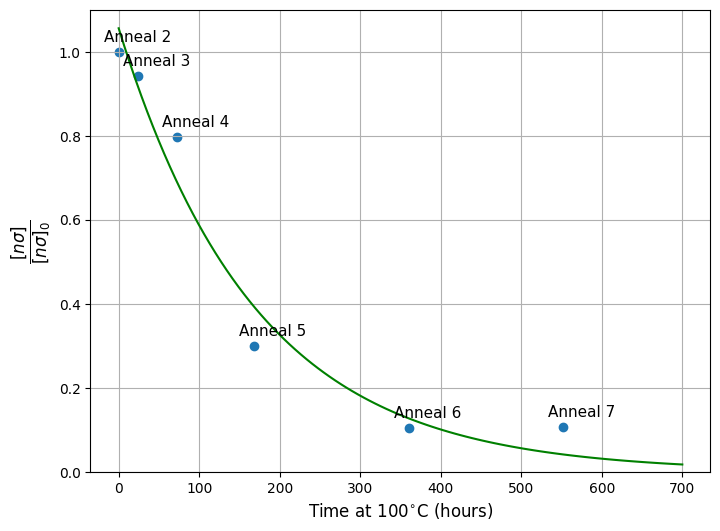

In [157]:
times =[0, 24, 72, 168, 360, 552]
scale_factor = f_linear_rad(FWHM_anneal[0]) #[n\sigma]^-1_0
print(FWHM_anneal[0])
print(scale_factor)
#from sean, I can adjust later 
scaled_product = scale_factor/f_linear_rad(FWHM_anneal)
print(FWHM_anneal)


#plt.axhline(scale_factor/f_linear_rad(50.36), color='r', linestyle = "--", label = "post rad 2")

exp_plot(times, scaled_product,  0.6, 100.0, 0, 700, 0, 1.1,"Time at 100$^{\circ}$C (hours)" , "$\dfrac{[n \sigma]}{[n \sigma]_0}$ " , labels=['Anneal 2', 'Anneal 3', 'Anneal 4', 'Anneal 5', 'Anneal 6', 'Anneal 7'])
#plt.legend()

In [155]:
print(f_linear_rad(2.964))

946.2264150943397


10
[21.22477736488156, 19.27963438313418, 17.025664989410984, 7.43794676440632, 3.088438716642372, 3.1280847810038495]
errors:[7.11702560e-03 2.90323756e+01]
errors:[7.11702560e-03 2.90323756e+01]
errors:[7.11702560e-03 2.90323756e+01]
errors:[7.11702560e-03 2.90323756e+01]
Decay Constant: -170.12252805699714
Amp: 0.11486248064864357
errors:[0.06040089 2.73721959]
errors:[0.06040089 2.73721959]
errors:[0.06040089 2.73721959]
errors:[0.06040089 2.73721959]
Decay Constant: -16.420290212706174
Amp: 0.9970542544422433


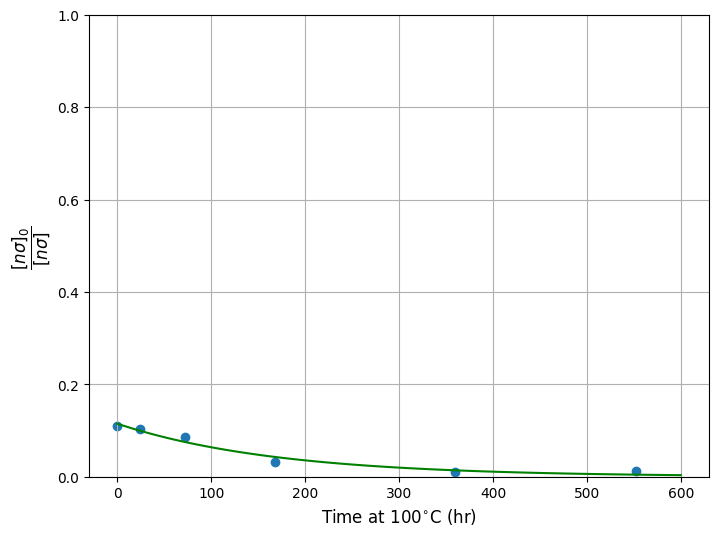

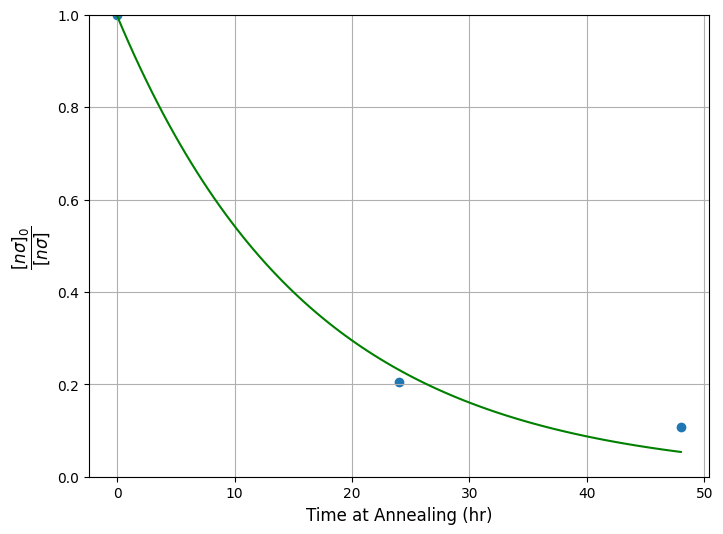

In [145]:
#now plot it scaled by the trapping product after the second round of radiation

scale_factor = 10
print(scale_factor)
#from sean, I can adjust later 
scaled_product = scale_factor/f_linear_rad(FWHM_anneal)
print(FWHM_anneal)

exp_plot(times, scaled_product,  0.6, 100.0, 0, 600, 0, 1.0,"Time at 100$^{\circ}$C (hr)" ,"$\dfrac{[n \sigma]_{0}}{[n \sigma]}$ " , labels=False)
exp_plot([0, 24, 48], [1, scale_factor/f_linear_rad(38.11),scale_factor/f_linear_rad(21.11)], 0.6, 100.0, 0, 48, 0, 1,"Time at Annealing (hr)", "$\dfrac{[n \sigma]_{0}}{[n \sigma]}$ ", labels=False)
#plot product vs time annealing  scatter
# plt.scatter(times, scaled_product, marker ="*", color ='orange', label ="linear interpolation")
# plt.xlabel("Time at 100$^{\circ}$C (hr)")
# plt.ylabel("$\dfrac{[n \sigma]}{[n \sigma]_{0}}$ ")
# plt.title(" Percent of Product Annealed vs. Annealing Time")
# plt.grid()
# plt.show()



10
errors:[2.07891432e-02 2.91515847e+01]
errors:[2.07891432e-02 2.91515847e+01]
errors:[2.07891432e-02 2.91515847e+01]
Decay Constant: -170.10961408114372
errors:[2.07891432e-02 2.91515847e+01]
0.17550389603826097
errors:[inf inf]
errors:[inf inf]
errors:[inf inf]
Decay Constant: -74.9769085398729
errors:[inf inf]
0.2833091712862126


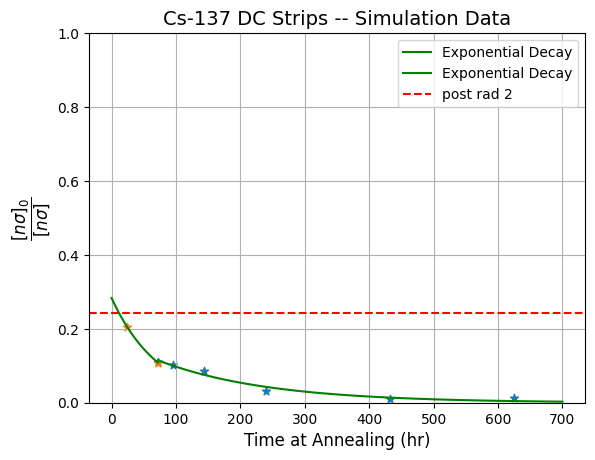

In [184]:
scale_factor = 10
print(scale_factor)
#from sean, I can adjust later 
scaled_product = scale_factor/f_linear_rad(FWHM_anneal)

times =[0, 24, 72, 168, 360, 552]

for i in range(len(times)):
    times[i]=times[i]+72

exp_plot(times, scaled_product,  0.6, 100.0, 72, 700, 0, 1.0,"Time at 100$^{\circ}$C (hr)" ,"$\dfrac{[n \sigma]_{0}}{[n \sigma]}$ " , labels=False)
exp_plot([ 24, 72], [ scale_factor/f_linear_rad(38.11),scale_factor/f_linear_rad(21.11)], 0.6, 100.0, 0, 72, 0, 1,"Time at Annealing (hr)", "$\dfrac{[n \sigma]_{0}}{[n \sigma]}$ ", labels=False)
plt.axhline(scale_factor/f_linear_rad(50.36), color='r', linestyle = "--", label = "post rad 2")
plt.legend()

In [21]:
#THIS IS ANOTHER METHOD I TRIED
#DISREGARD IT



#out of curiosity I'll try to get a linear fit by my earlier method

# coefficients = np.polyfit(time_list,product_list_adj , 1)

# # Create a polynomial function from the coefficients
# linear_fit = np.poly1d(coefficients)

# # Generate new x values for the fit line
# times_new = np.linspace(np.array(time_list).min(), np.array(time_list).max(), 500)

# # Compute the y values for the fit line
# y_fit = linear_fit(times_new)

# plt.plot(times_new, y_fit, label =" linear fit to linear interpolation")

# plt.scatter(time_list, product_list_adj)
# plt.xlabel("Time at 100C (hr)")
# plt.ylabel("$[n \sigma]^{-1} $ (cm)")
# plt.text(300, 200, "Slope = " + str(round(coefficients[0], 3) )+ " cm/hr", fontsize=12)
# plt.grid()
# plt.show()
# print(f"Linear fit coefficients: {coefficients}")

NameError: name 'time_list' is not defined

In [ ]:
#to compare trapping product to time at 100C:
#rewrite functions for each var in terms of FWHM according to the decay constants we found from data above

def trapping_product(array, l, A):
    product_list=[]
    for i in array:
        product = -l/np.log(i/A)
        product_list.append(product)
    return product_list
def anneal_time(array, tau, A):
    time_list=[]
    for i in array:
        time = -tau*np.log(i/A)
        time_list.append(time)
    return time_list 

#define constants from above and an array of FWHM
l = decayfit(product_val_new, FWHMs_rad_new, 20.0, 100.0, 0.0, 2000.0)[2]
print(l)
A_product = decayfit(product_val_new, FWHMs_rad_new, 20.0, 100.0, 0.0, 2000.0)[3]
print(A_product)

#lifted these from my other notebook 
tau = 136.426
A_time =27.038

FWHM_array = np.arange(1.5, 25.0, 0.5)
#print(FWHM_array)

time_list=anneal_time(FWHM_array, tau, A_time)
product_list= trapping_product(FWHM_array, l, A_product)
product_list_adj = product_list[::-1]


print((time_list), (product_list))

In [ ]:
plt.scatter(time_list, product_list_adj)
plt.xlabel("Time at 100C (hr)")
plt.ylabel("$[n \sigma]^{-1} $ (cm)")
plt.grid()
plt.show()
# we need to extract only the times and products that correspond to physical FWHM 

#time_list_adj =time_list[1:111]
#product_list_adj=product_list[1:111]

# for i in range(len(time_list)):
#     if time_list[i]<300.0:
#         time_list_adj.append(time_list[i])
#     if product_list[i]<70000.0:
#         product_list_adj.append(product_list[i])
        


plt.scatter(time_list, product_list_adj)
plt.xlabel("Time at 100C (hr)")
plt.ylabel("$[n \sigma]^{-1}$ (cm)")
plt.show()
